# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 3

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **20 марта в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

*Замечания.* Решения теоретических пунктов можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab.

Фотографии принимаются только в хорошем качестве, следите за освещением и почерком. На фотографиях также указывайте номера задач.

### Задача 1. Несмещенность оценок.

**Теория**

Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим статистику $S^2=\frac1n\sum\limits_{i=1}^n(X_i-\overline{X})^2$.

a). Докажите, что статистика $S^2$ равна $\overline{X^2}-\overline{X}^2$ и является состоятельной оценкой $\sigma^2$;

b). Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

c*). Докажите, что если конечны первые четыре момента ( $\mathsf{E}X, \mathsf{E}X^2, \mathsf{E}X^3, \mathsf{E}X^4$) распределения  $\mathsf{P}$, то статистика $S^2$ является асимптотически нормальной оценкой $\sigma^2$ и найдите ее асимптотическую дисперсию.
        

**Ответ:**

a) $S^2=\frac1n\sum\limits_{i=1}^n(X_i-\overline{X})^2 = \frac1n\sum\limits_{i=1}^n(X^2_i + \overline{X}^2 - 2 X_i  \overline{X}) = \frac{\sum\limits_{i=1}^n (X^2_i)}{n} + \frac{\sum\limits_{i=1}^n (\overline{X}^2)}{n} - 2 \frac{\sum\limits_{i=1}^n (X_i \overline{X})}{n} = \overline{X^2} + \overline{X}^2 - 2 \overline{X} * \overline{X} = \overline{X^2}-\overline{X}^2$


Из закона больщих чисел следует, что выборочное среднее сходится по вероятности к матожиданию, а значит: $S^2 \to \mathsf{E}X^2 - (\mathsf{E}X)^2 = \sigma^2$. Значит: $S^2 \to \sigma^2$ по вероятности, следовательно $S^2$ является состоятельной оценкой.


б) Посчитаем мат.ожидание статистики $S^2$. Пусть $\mu = \mathsf{E}X$. $\mathsf{E}S^2 = \mathsf{E}( \frac1n\sum\limits_{i=1}^n(X_i-\overline{X})^2) = \mathsf{E}( \frac1n\sum\limits_{i=1}^n((X_i - \mu)-(\overline{X}-\mu))^2) = \mathsf{E}(\frac1n\sum\limits_{i=1}^n(X_i - \mu)^2 - 2(\overline{X} - \mu)\frac1n\sum\limits_{i=1}^n(X_i - \mu) + (\overline{X} - \mu)^2) = \mathsf{E} (\frac1n\sum\limits_{i=1}^n( X_i - \mu)^2 - (\overline{X} - \mu)^2)$. 

Т.к. $\mathsf{E} (\frac1n\sum\limits_{i=1}^n(X_i - \mu)^2) = \sigma^2$, то: $\mathsf{E}S^2 = \sigma^2 - \mathsf{E} (\overline{X} - \mu)^2)$

$\mathsf{E} (\overline{X} - \mu)^2) = \mathsf{E} ((\frac1n\sum\limits_{i=1}^n (X_i - \mu))^2) =\mathsf{E} (\frac{1}{n^2} \sum\limits_{i=1}^n (X_i - \mu)^2 + \frac{2}{n^2} \sum\limits_{i=1, j=1, i<j}^n (X_i - \mu)(X_j - \mu)) = \frac1n\mathsf{E} (\frac1n \sum\limits_{i=1}^n (X_i - \mu)) + \mathsf{E} (\frac{2}{n^2}\sum\limits_{i=1, j=1, i<j}^n (X_i - \mu)(X_j - \mu) ) = \frac1n \sigma^2 + 0$

Второй член занулился, так как $X_i, X_j$ независимы и $\mathsf{E} (X_i - \mu) = 0$

Получается, что $\mathsf{E}S^2 = \sigma^2 - \frac1n\sigma^2 = \frac{n-1}{n} \sigma^2$. Значит, статистика $S^2$ является смещенной оценкой $\sigma^2$.


**Практика** 

Пусть теперь $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$.

Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными? Поясните свой ответ. 

**Ответ:**

**Статистика $\frac{n}{n-1} S^2$ является несмещенной оценкой $\sigma^2$**. Статистика $S^2$ - смещенная оценка, это показано в пункте выше. Соответственно, чтобы ее исправить, ее надо домножить на $\frac{n}{n-1}$. После домножения получится статистика $\frac{n}{n-1} S^2$ чтд.

Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta_1}, ... , \widehat{\theta_k}$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, 1)$. Далее вычислите среднее этих оценок, которое обозначим $\overline{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta_1}, $y$), ... , (\widehat{\theta_k}, y)$ и среднее *этих оценок* $(\overline{\theta}, y)$, где $y$ &mdash; произвольные различные (например 0, 1) координаты для двух различных типов оценок ($S^2, \frac{n}{n-1}S^2$).

* Повторите действие четыре раза для $n \in \{5, 10, 100, 500\}$. В итоге получится четыре графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте данный шаблон для визуализации значений:

In [2]:
# # Для каждой оценки:
# plt.scatter(<независимые оценки> , np.zeros(k) + y, 
#             alpha=0.1, s=100, color=<цвет>, label=<метка>)
# plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200, 
#             color='w', edgecolors='black')

# # Для всего графика:
# plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
# plt.title('sample size = %d' % k)
# plt.yticks([])
# plt.legend()

**Решение:**

In [3]:
k = 500

n = [5, 10, 100, 500]

#data is list object, because shapes of data slices are different. Also, that s why i use list comprehension
data = [sps.norm.rvs(size=(k, n[i])) for i in range(len(n))] 



simp_theta = np.array([np.var(data[i], axis=1) for i in range(len(n))]) #S^2
comp_theta = np.array([simp_theta[i]*(n[i]/(n[i]-1)) for i in range(len(n))]) #n/(n-1) S^2



simp_theta_mean = np.mean(simp_theta, axis=1)
comp_theta_mean = np.mean(comp_theta, axis=1)


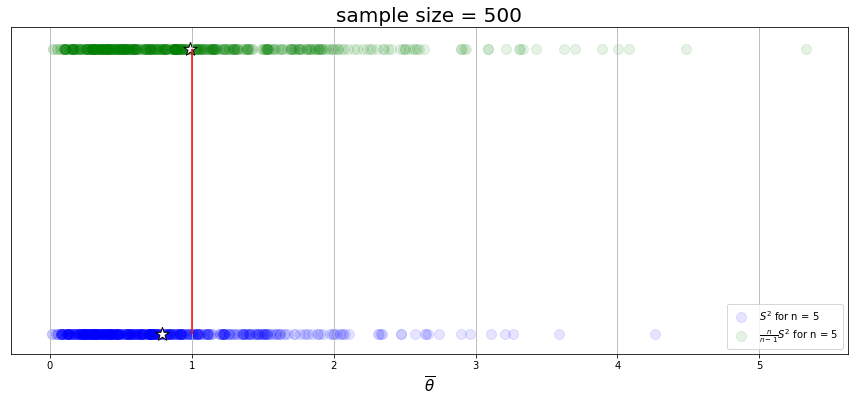

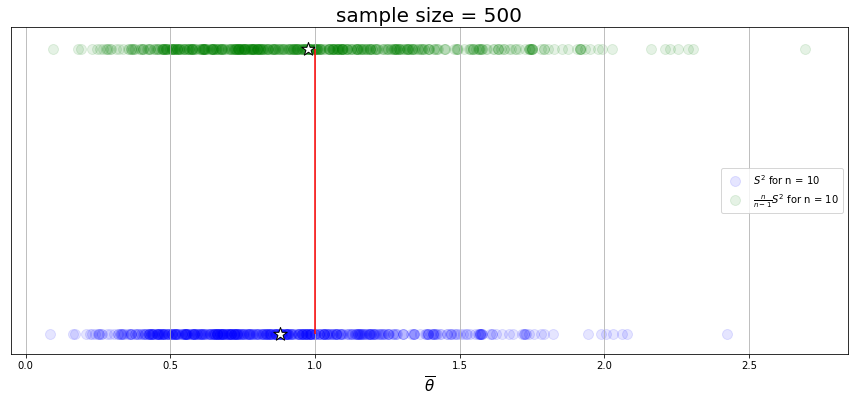

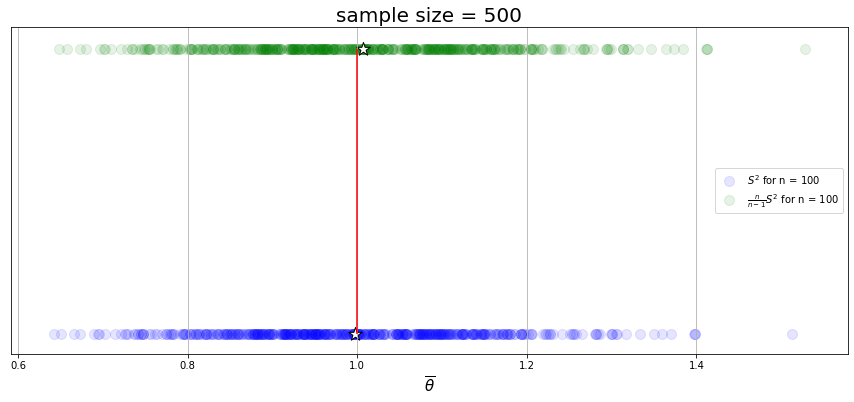

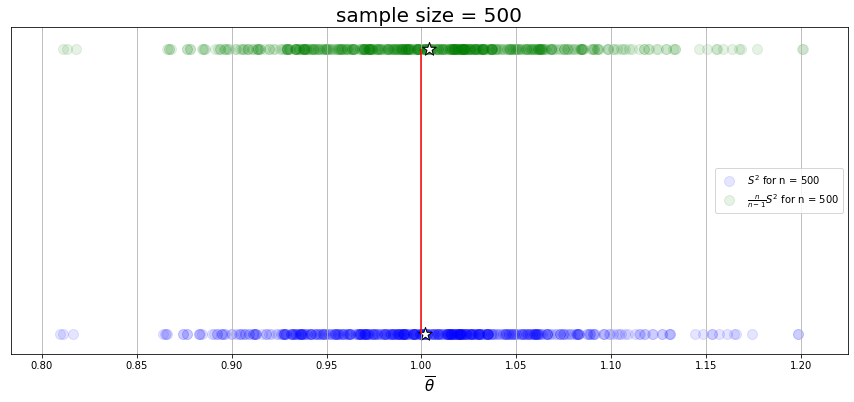

In [4]:
y = [0, 1]

for i in range(len(n)):
    plt.figure(figsize=(15, 6))
    plt.grid(True)
    plt.scatter(simp_theta[i], np.zeros(k) + y[0], 
                alpha=0.1, s=100, color='b', label=f'$S^2$ for n = {n[i]}')
    plt.scatter(simp_theta_mean[i], y[0], marker='*', s=200, 
                color='w', edgecolors='black')
    
    label_ = '$\\frac{n}{n-1}S^2$' + f' for n = {n[i]}'
    plt.scatter(comp_theta[i], np.zeros(k) + y[1], 
                alpha=0.1, s=100, color='g', label=label_)
    plt.scatter(comp_theta_mean[i], y[1], marker='*', s=200, 
                color='w', edgecolors='black')

    plt.vlines(1, y[0], y[1], color='r')
    plt.title('sample size = %d' % k, fontsize=20)
    plt.yticks([])
    plt.xlabel('$\\overline{\\theta}$', fontsize=15)
    plt.legend()
    plt.show()

**2.** Изучим поведение среднего оценок из первого пункта при росте размера $n$ выборки. Постройте график зависимости $\overline{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из п. 1.1 достаточно большого размера и посчитать оценки по префиксам, используя функции из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. Какие из оценок являются асимптотически несмещёнными, т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$?

**Решение:**

In [5]:
N = 1000
k = 500
grid = np.arange(1, N+1)

new_data = sps.norm.rvs(size = (k, N))
cum_sum = np.cumsum(new_data, axis = 1)
cum_mean = cum_sum / grid # cum_mean[i][j] contains mean of first j values in i experiment 

new_data_squared = new_data**2 #x_i^2
cum_sum_squared = np.cumsum(new_data_squared, axis = 1) #sum_{i=1}^n (x_i^2)
cum_mean_squared = cum_sum_squared / grid

new_grid = grid = np.arange(2, N+1)

var = (cum_mean_squared - (cum_mean)**2)[:, 1:] #i won t use prefix n=1, because in the next step i would have devide it by 0
var_mean = np.mean(var, axis = 0)

var_correction = var * new_grid / (new_grid - 1)
var_correction_mean = np.mean(var_correction, axis = 0)


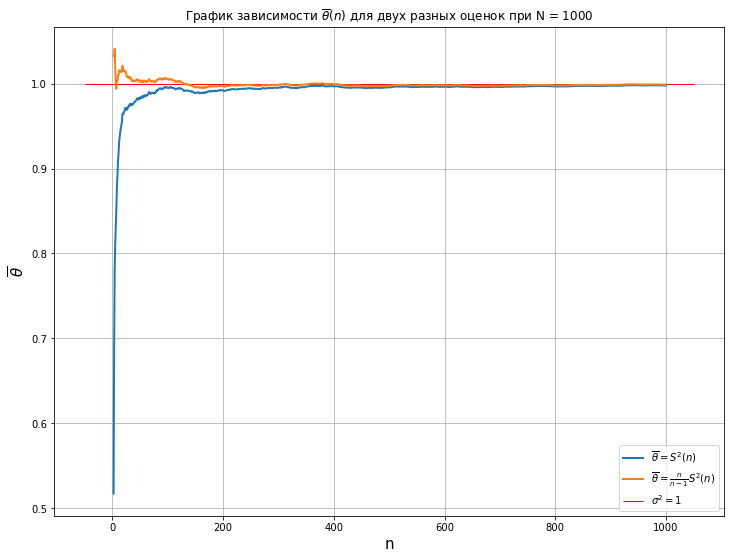

In [6]:
plt.figure(figsize = (12, 9))
plt.grid(True)

plt.plot(new_grid, var_mean, label = '$\\overline{\\theta} = S^2(n)$', linewidth=2)
plt.plot(new_grid, var_correction_mean, label = '$\\overline{\\theta} = \\frac{n}{n-1} S^2(n)$', linewidth=2)
plt.hlines(1, -50, N+50, color='r', linewidth=1, label = '$\\sigma^2 = 1$')


plt.title('График зависимости $\\overline{\\theta} (n)$ для двух разных оценок' + f' при N = {N}')
plt.xlabel('n', fontsize=15)
plt.ylabel('$\\overline{\\theta}$', fontsize=15)
plt.legend()
plt.show()


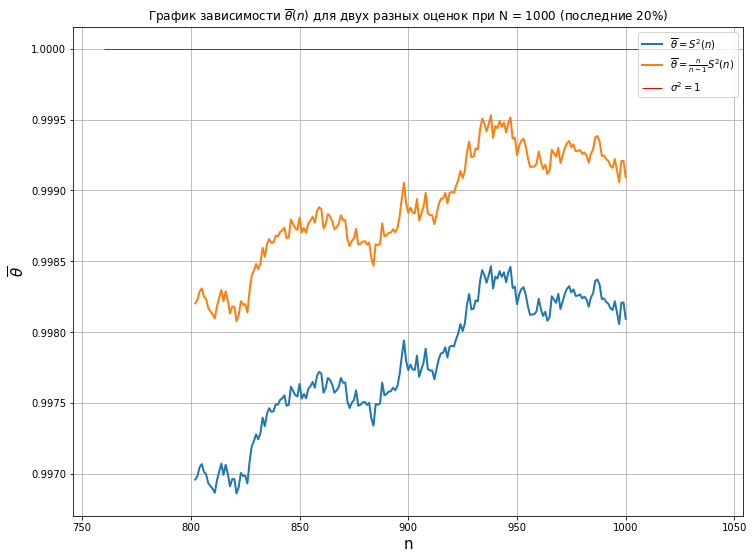

In [7]:
plt.figure(figsize = (12, 9))
plt.grid(True)

scale_1 = 0.8

plt.plot(new_grid[int(N*scale_1):], var_mean[int(N*scale_1):], label = '$\\overline{\\theta} = S^2(n)$', linewidth=2)
plt.plot(new_grid[int(N*scale_1):], var_correction_mean[int(N*scale_1):], label = '$\\overline{\\theta} = \\frac{n}{n-1} S^2(n)$', linewidth=2)
plt.hlines(1, int((N-50)*0.8), N + int((50)*0.8), color='r', linewidth=1, label = '$\\sigma^2 = 1$')


plt.title('График зависимости $\\overline{\\theta} (n)$ для двух разных оценок' + f' при N = {N} (последние {round((1-scale_1) * 100)}%)')
plt.xlabel('n', fontsize=15)
plt.ylabel('$\\overline{\\theta}$', fontsize=15)
plt.legend()
plt.show()

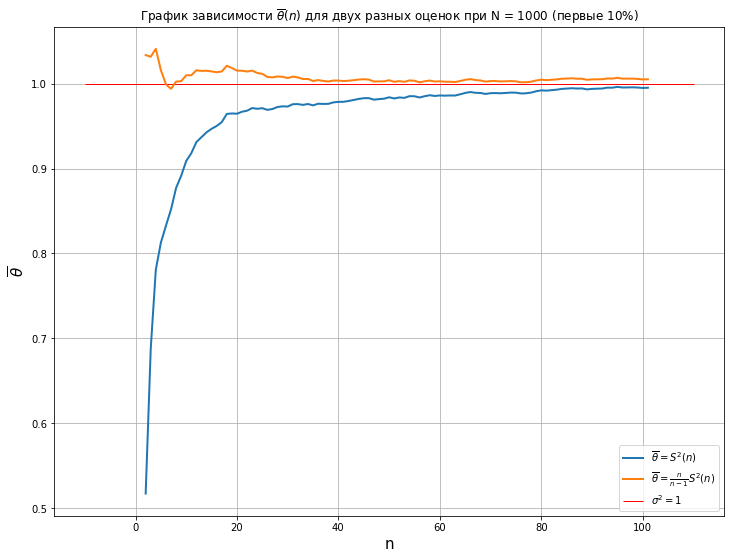

In [8]:
plt.figure(figsize = (12, 9))
plt.grid(True)

amount = 100 if N>100 else N

plt.plot(new_grid[:amount], var_mean[:amount], label = '$\\overline{\\theta} = S^2(n)$', linewidth=2)
plt.plot(new_grid[:amount], var_correction_mean[:amount], label = '$\\overline{\\theta} = \\frac{n}{n-1} S^2(n)$', linewidth=2)
plt.hlines(1, -10, amount+10, color='r', linewidth=1, label = '$\\sigma^2 = 1$')


plt.title('График зависимости $\\overline{\\theta} (n)$ для двух разных оценок' + f' при N = {N} (первые {round((amount/N) * 100)}%)')
plt.xlabel('n', fontsize=15)
plt.ylabel('$\\overline{\\theta}$', fontsize=15)
plt.legend()
plt.show()

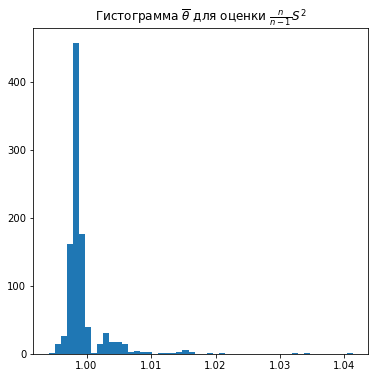

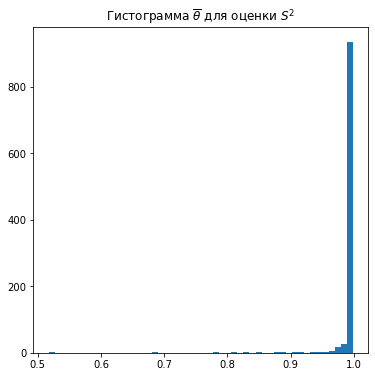

In [9]:
plt.figure(figsize=(6, 6))
plt.title('Гистограмма $\\overline{\\theta}$ для оценки $\\frac{n}{n-1} S^2$')
plt.hist(var_correction_mean, bins=50)

plt.figure(figsize=(6, 6))
plt.hist(var_mean, bins=50)
plt.title('Гистограмма $\\overline{\\theta}$ для оценки $ S^2$')
plt.show()


Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** 

**Несмещенность оценки - это такое свойство оценки, при котором мат. ожидание оценки равно оцениваемому параметру.**

**Сделанные эксперименты подтверждают теорию: оценка $S^2$ "долго" стремиться к оцениваемому параметру, и при малых размерах выборки плохо оценивает параметр (это иллюстрирует график зависимости $\overline{\theta} (n)$ для двух разных оценок для первых элементов массива оценок и "длинный левый хвост гистограммы"). Но в пределе (при достаточно больших N) оценка $S^2$ все же сходится к параметру (это иллюстрирует график зависимости $\overline{\theta} (n)$ для двух разных оценок для последних 20% элементов массива оценок и острый пик гистограммы в значении параметра). Все это означает, что оценка $S^2$ смещенная, но асимптотически несмещенная.**

**Оценка $\frac{n}{n-1}S^2$ уже при относительно небольших значениях n довольно близко подходит к оцениваемому параметру (это иллюстрирует график зависимости $\overline{\theta} (n)$ для двух разных оценок для первых элементов массива оценок и "короткие хвосты гистограммы"). В пределе (при достаточно больших N) оценка $\frac{n}{n-1}S^2$ сходится к параметру (это иллюстрирует график зависимости $\overline{\theta} (n)$ для двух разных оценок для последних 20% элементов массива оценок и острый пик гистограммы в значении параметра). Все это означает, что оценка $\frac{n}{n-1}S^2$ несмещенная и асимптотически несмещенная. (вообще говоря, если хотя бы одна из этих оценок асимптотически несмещенная, то вторая тоже будет ас. несмещенной по правилу предела произведения).**

**В лабораторных по физике используют скорректированное выборочное среднее, так-как оно быстрее сходится к оцениваемому параметру на малых объемах выборки.**

### Задача 2. Гамма-излучение.

Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

*Замечание:* Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить подписи к графику.

**Решение:**

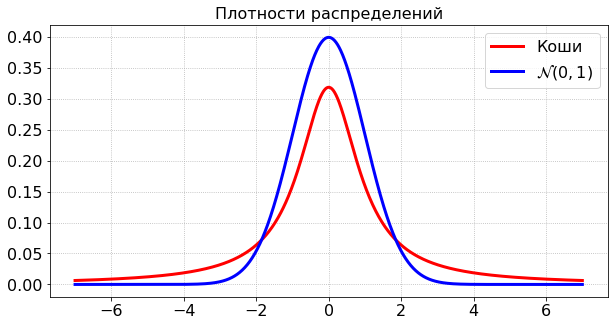

In [10]:
area = (-7, 7)
grid = np.linspace(*area,  1000)

plt.figure(figsize=(10, 5))
plt.plot(grid, sps.cauchy.pdf(grid), color='r', label='Коши', lw=3)
plt.plot(grid, sps.norm.pdf(grid), color='b', 
         label='$\mathcal{N}(0, 1)$', lw=3)
plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.title('Плотности распределений', fontsize=16)
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод:** 

**2.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши ($\theta = 0$). Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\widehat{\mu}$ —  выборочная медиана;
- Oдношаговая оценка, построенная по выборочной медиане (см. лекцию 4). 

В случае выборочной медианы можно использовать цикл по подвыборкам.

На одном графике изобразите зависимость значений этих оценок от $n$.
Сравните асимптотические дисперсии оценок (для тех оценок, для которых они существуют). Сделайте вывод.

**Замечание:** если некоторые оценки имеют большой разброс, и разница между графиками зависимостей оценок с малыми значениями недостаточно заметна, стоит сделать два графика, на одном из которых будут изображены все оценки, а на втором &mdash; только достаточно хорошие (мало отличающиеся от оцениваемого параметра), то есть этот график будует иметь меньший масштаб по оси $y$.

**Решение:**

In [11]:
N = 1000
k = 500

data_cauchy = sps.cauchy.rvs(size=(k, N))

grid = np.arange(1, N+1)

mean = np.cumsum(data_cauchy, axis = 1)/grid #выборочное среднее

med = np.array([np.median(data_cauchy[:, :i+1], axis = 1) for i in range(data_cauchy.shape[1])]).T #медиана

# med.shape

In [12]:
# одношаговая оценка по выборочной медиане
theta = np.zeros((k, N))
grid = np.arange(1, N+1)
for i in range(N):
    x = data_cauchy[:, :i+1]
    
    numerator_arr = (x - med[:, i].reshape((k, 1)))/(1 + (x - med[:, i].reshape((k, 1)))**2)

    numerator = np.sum(numerator_arr)
    
    denominator_arr = (1 - (x - med[:, i].reshape((k, 1)))**2)/((1 + (x - med[:, i].reshape((k, 1)))**2)**2)
    denominator = np.sum(denominator_arr)
    theta[:, i] = med[:, i] + numerator/denominator




In [13]:
#усредняю оценки вдоль каждого n
new_mean = np.mean(mean, axis = 0)
new_med = np.mean(med, axis = 0)
new_theta = np.mean(theta, axis = 0)


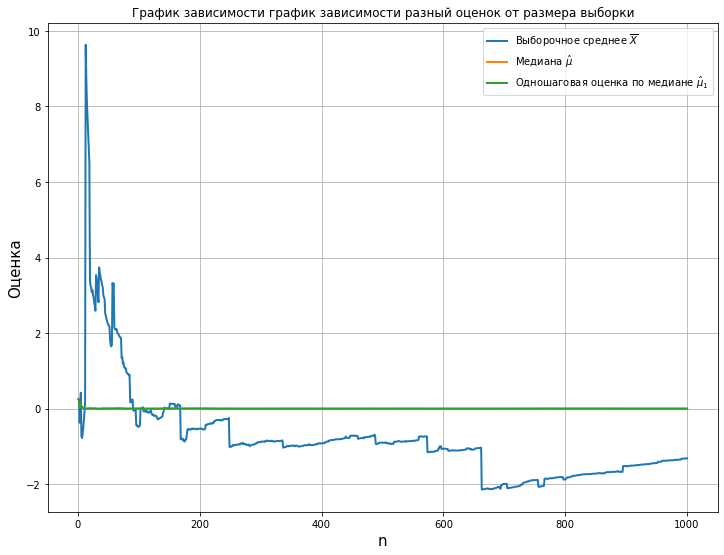

In [14]:


plt.figure(figsize = (12, 9))
plt.grid(True)



plt.plot(grid, new_mean, label = 'Выборочное среднее $\\overline{X}$', linewidth=2)
plt.plot(grid, new_med, label = 'Медиана $\\hat{\\mu}$', linewidth=2)
plt.plot(grid, new_theta, label = 'Одношаговая оценка по медиане $\\hat{\\mu}_1$', linewidth=2)
# plt.hlines(1, -50, N+50, color='r', linewidth=1, label = '$\\sigma^2 = 1$')


plt.title('График зависимости график зависимости разный оценок от размера выборки')
plt.xlabel('n', fontsize=15)
plt.ylabel('Оценка', fontsize=15)
plt.legend()
plt.show()

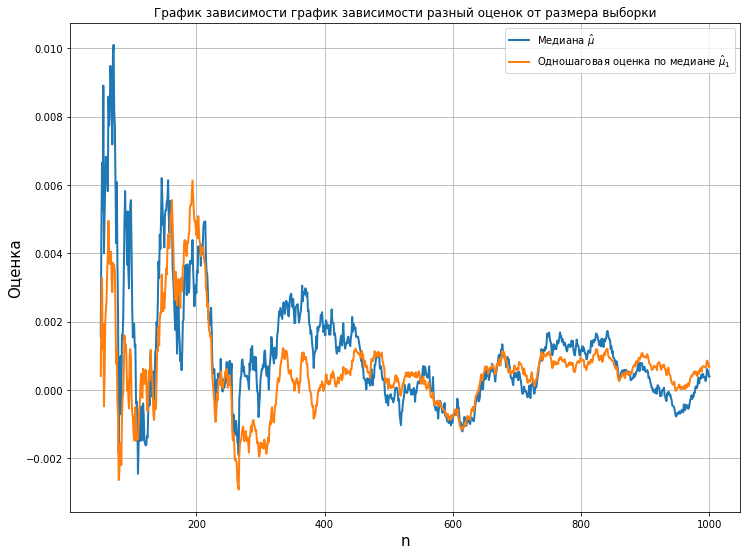

In [15]:


plt.figure(figsize = (12, 9))
plt.grid(True)



# plt.plot(grid, new_mean, label = 'Выборочное среднее $\\overline{X}$', linewidth=2)
plt.plot(grid[50:], new_med[50:], label = 'Медиана $\\hat{\\mu}$', linewidth=2)
plt.plot(grid[50:], new_theta[50:], label = 'Одношаговая оценка по медиане $\\hat{\\mu}_1$', linewidth=2)
# plt.hlines(1, -50, N+50, color='r', linewidth=1, label = '$\\sigma^2 = 1$')


plt.title('График зависимости график зависимости разный оценок от размера выборки')
plt.xlabel('n', fontsize=15)
plt.ylabel('Оценка', fontsize=15)
plt.legend()
plt.show()

**Вывод:** 

Видно, что среднее плохо оценивает параметр (логично, оно распределено как и изначальное распеделение). Медиана и одношаговая оценка по медиане гораздо лучше оценивают параметр, так как на них не влияют хвосты распределения. А при достаточном объеме выборки и вовсе сходятся к параметру (т.к. они АНО) (все это можно пронаблюдать на графиках)

## Задача 3. Белые мышки.


**Теория**

Пусть $X_1, ... X_n$ &mdash; выборка из распределения $Gamma(\theta, \beta)$ &mdash; гамма-распределение с плотностью $p_{\theta}(x) = \frac{\theta^{\beta} x^{\beta-1}}{\Gamma(\beta)} e^{-\theta x} $, где $\beta$ фиксировано, а $\Gamma(\beta)$ &mdash; [гамма-функция](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F) ;



Найдите 


- 1). оценку максимального правдоподобия $\theta$;

- 2). ее асимптотическую дисперсию, считая выполненными условия теоремы об ОМП. 

**Ответ**

* 1) 

$p = \frac{\theta^\beta x^{\beta - 1}}{\Gamma(\beta)} e^{-\theta x}$

$L = \frac{\theta^{n \beta} (\prod\limits_{n} x)^{\beta - 1}}{\Gamma^n(\beta)} e^{-\theta S_n}$

$l = n \beta ln(\theta) + (\beta -1) ln(\prod(x)) - \theta S_n - n ln(\Gamma(\beta))$

$\frac{\partial l}{\partial \theta} = \frac{n \beta}{\theta} - S_n$

$\hat\theta = \frac{\beta}{\overline x}$


* 2)

$D = \frac{\theta^2}{\beta}$ (это посчитано из информации Фишера)

**Практика**

Скачайте <a href="https://www.kaggle.com/ruslankl/mice-protein-expression
">датасет</a> с данными об экспрессии белков у белых мышей. Данный датасет состоит из таблицы значений уровней экспрессии 77 различных белков в мозге у мышей. Каждая строка соответствует одной особи, каждый столбец соответствует одному белку. На столбцы Genotype, Treatment и подобные пока не обращаем внимания. 

In [16]:
df = pd.read_csv("./Data_Cortex_Nuclear.csv") 

Выберем для анализа белки ITSN1_N, DYRK1A_N, pBRAF_N, pCREB_N.

In [17]:
columns = ['ITSN1_N', 'DYRK1A_N', 'pBRAF_N', 'pCREB_N']  

df_chosen_columns = df[columns]

Постройте гистограммы изучаемых признаков.

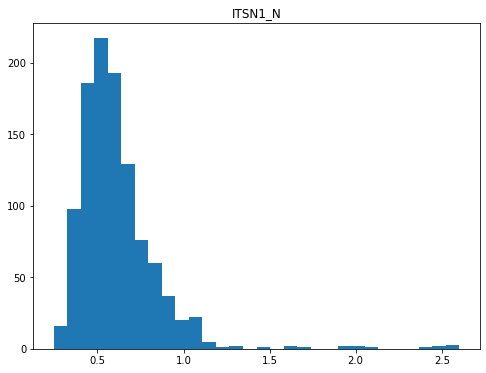

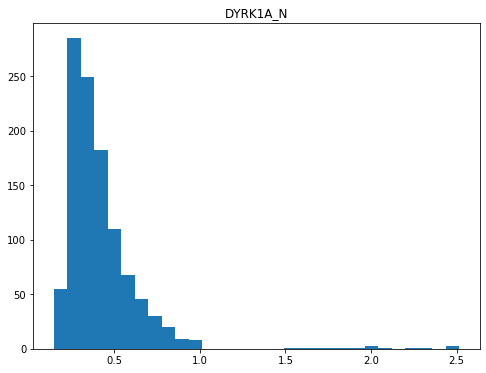

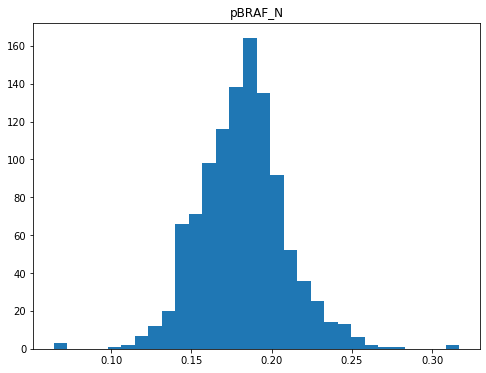

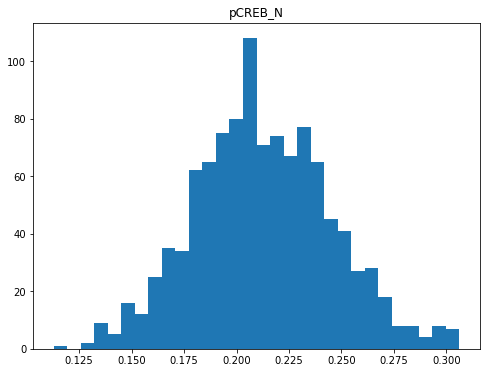

In [18]:
for column in columns:
    plt.figure(figsize = (8, 6))
    plt.hist(df_chosen_columns[column], bins = 30)
    plt.title(f'{column}')

у некоторых оценок есть хвосты, уберем их.

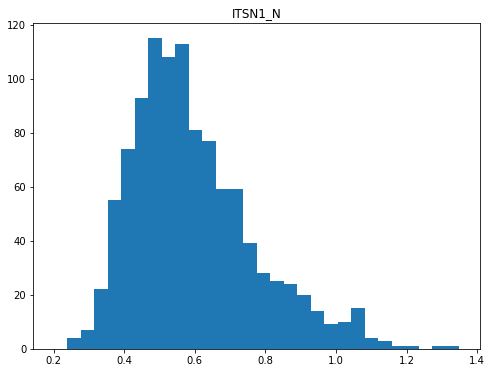

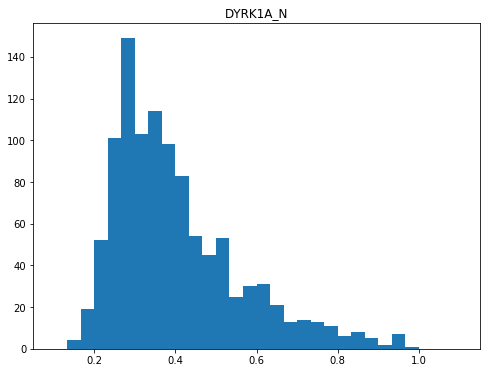

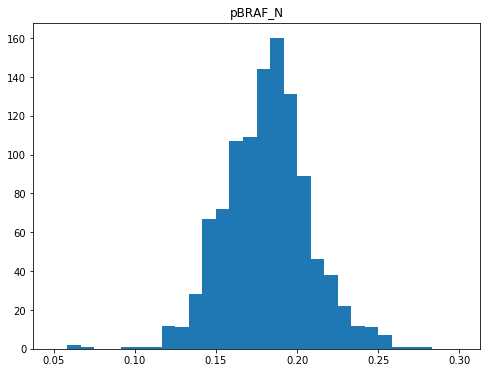

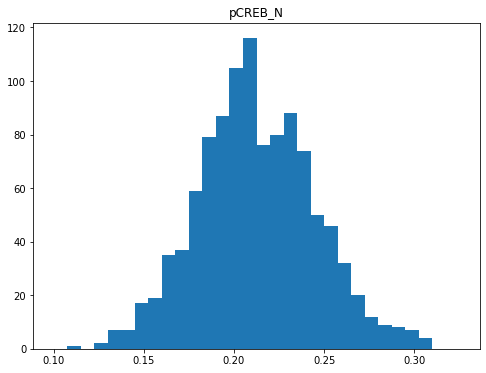

In [19]:
ranges = {'ITSN1_N': (0.2, 1.35), 
          'DYRK1A_N': (0.1, 1.1), 
          'pBRAF_N': (0.05, 0.3), 
          'pCREB_N': (0.1, 0.325)}

for column in columns:
    plt.figure(figsize = (8, 6))
    plt.hist(df_chosen_columns[column], bins = 30, range = ranges[column])
    plt.title(f'{column}')

**1.** 

В этой части задания вам предлагается найти оценки максимального правдоподобия (ОМП) по формулам, полученным в теоретической части задания и на семинаре. Вам также поможеет задание из Яндекс.Контеста. Если вам не удалось посчитать теоретически какую-то из нужных ОМП, сделайте хотя бы для той, которую посчитали.

Предположим, что признаки имеют следующие распределения: 


*   'pBRAF_N' и 'pCREB_N' &mdash; нормальное распределение с неизвестными параметрами $\theta = (a, \sigma^2)$;
*  'ITSN1_N' &mdash; гамма-распределение $Gamma(\theta, \beta)$ с плотностью $p_{\theta}(x) = \frac{\theta^{\beta} x^{\beta-1}}{\Gamma(\beta)} e^{-\theta x} $ с неизвестным параметром $\theta$ и известным параметром $\beta$, равным 13.5;
* 'DYRK1A_N' &mdash; гамма-распределение $Gamma(\theta, \beta)$ с неизвестным параметром $\theta$ и известным параметром $\beta$, равным 9.

Не пугайтесь гамма-распределения, оно тоже часто встречается, как мы и увидим в этой задаче.

*Замечание:* в `scipy.stats` у гамма-распределения параметр `a` означает $\beta$, а параметр `scale` означает $1 / \theta$.


Удалите неопределенные значения `nan` и выбросы и посчитайте ОМП для данных выборок признаков, предполагая, что они имеют указанные выше распределения. Подсчет ОМП оформите в виде функций, принимающих реализацию выборки и $\beta$ в случае гамма-распределения. Выведите полученные значения параметров.

Для избавления от копипаста используйте циклы и функции. Копипаст является серезным источником ошибок на практике.

In [20]:


cleaned_df = df_chosen_columns.dropna()


In [21]:
#ОМП для гамма распределения
def get_OMP_gamma(x: pd.core.series.Series, b: float) -> float:
    return b/np.mean(x)

def get_OMP_norm(x: pd.core.series.Series) -> (float, float):
    a = np.mean(x)
    d = np.var(x)
    
    return (a, d)
    

In [22]:
_dict = {'ITSN1_N': ('g', 13.5), 
         'DYRK1A_N': ('g', 9), 
         'pBRAF_N': ('n'), 
         'pCREB_N': ('n')}


for column in columns:
    if _dict[column][0] == 'g':
        print('theta for ', column, ' is ','%.4f' % get_OMP_gamma(cleaned_df[column], _dict[column][1]))
    if _dict[column][0] == 'n':
        print('theta for ', column, ' is ', '%.4f' % get_OMP_norm(cleaned_df[column])[0], ', ', '%.4f' % get_OMP_norm(cleaned_df[column])[1])

theta for  ITSN1_N  is  21.8764
theta for  DYRK1A_N  is  21.1362
theta for  pBRAF_N  is  0.1818 ,  0.0007
theta for  pCREB_N  is  0.2126 ,  0.0011


Постройте для каждого признака на одном графике гистограмму каждого признака, график ядерной оценки плотности и график плотности распределения с параметрами, являющимися полученной ОМП. Графики для разных признаков стройте на разных графиках, но на одной matplotlib-фигуре. Сравните получившиеся результаты. Сделайте выводы.

/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensi

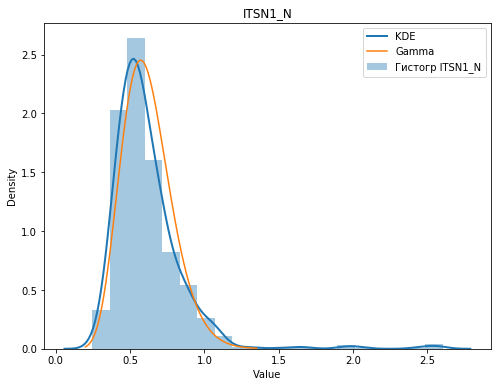

/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensi

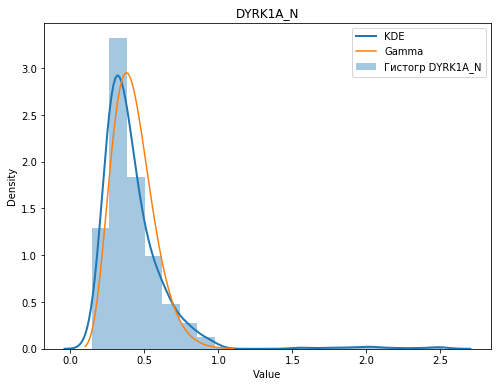

/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensi

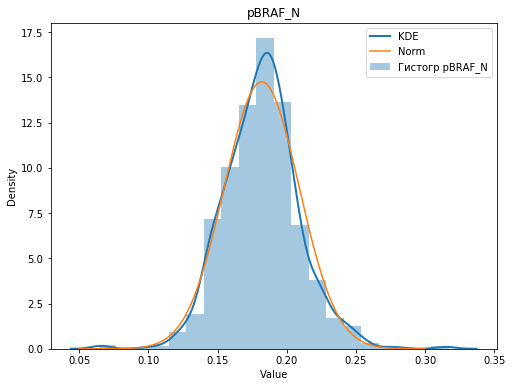

/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensi

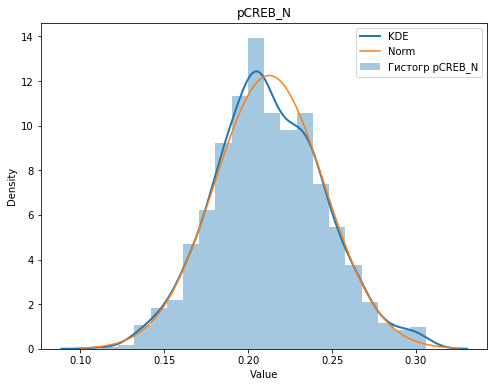

In [23]:
for column, value in _dict.items():
    plt.figure(figsize = (8, 6))
    sns.distplot(cleaned_df[column], bins = 20, label = f'Гистогр {column}', kde_kws={"label": "KDE", "linewidth": 2})
    if _dict[column][0] == 'g':
        grid = np.linspace(*ranges[column], 1000)
        plt.plot(grid, sps.gamma.pdf(grid, a = _dict[column][1],
                                     scale = 1/(get_OMP_gamma(cleaned_df[column], _dict[column][1]))), label = 'Gamma')
    if _dict[column][0] == 'n':
        grid = np.linspace(*ranges[column], 1000)
        plt.plot(grid, sps.norm.pdf(grid, loc = get_OMP_norm(cleaned_df[column])[0], 
                                    scale = (get_OMP_norm(cleaned_df[column])[1])**0.5), label = 'Norm')
    
    plt.title(f'{column}')
    plt.xlabel('Value')
    plt.legend()
    plt.show()
    

In [24]:
# a = np.array([-1, 2, 3, 5])
# fil = a[(a>0) & (a < 4)]
# fil

**Вывод**

По всем 4 графикам хорошо видно, что выбранные распределения (гамма или нормальное) очень хорошо описывают наши данные. Это показывает как общий вид гистограмм и ядерная оценка плотности, так и то, что посчитанные по нашим ОМП распределения очень хорошо ложатся на гистограммы.

**2.**


Реализуйте функции, возвращающие значения функции правдоподобия  и логарифмической функции правдоподобия для гамма распределения с параметрам $\theta, \beta$. Функция принимает реализацию выборки и параметры. Логарифмическую функцию реализуйте с использованием формулы после ее упрощения, а не как взятие функции логарифма от уже вычисленного значения функции правдоподобия.

Для получения частичного балла можно использовать методы `pdf` и `logpdf` для плотности и логарифма плотности распределения в `scipy.stats`, для получения полного балла функции формулу нужно реализовать самостоятельно.

Для подсчета гамма-функции в знаменателе плотности распределения используйте `scipy.special.gamma`, а для подсчета логарифма гамма-функции &mdash; `scipy.special.loggamma`. 



In [25]:
from scipy.special import loggamma, factorial, gamma
def gamma_likelihood(x: np.ndarray, theta: float, beta: float) -> float:
    
    L = ((theta**(beta*x.size)) * (np.prod(x)**(beta-1)) * np.exp(-(theta) * np.sum(x))) / ((gamma(beta))**(x.size))
    
    return L


def gamma_loglikelihood(x: np.ndarray, theta: float, beta: float) -> float:
    
    lnL = (x.size)*beta*np.log(theta) + (beta-1)*np.sum(np.log(x)) - theta*np.sum(x) - (x.size)*loggamma(beta)
    
    
    return lnL

Выведите следующие значения:
- функции правдоподобия;
- логарифма, взятого от функции правдоподобия;
- логарифмической функции правдоподобия

на следующих реализациях выборок:
- `np.ones(5)*5` &mdash; 5 пятерок;
- `np.ones(500)*5`&mdash; 500 пятерок;
- `np.ones(500)*5`&mdash; 5000 пятерок;
- `np.ones(5)*500`.

Параметр $\beta$ положите равным 10, параметр $\theta$ положите равным 2.

Сделайте выводы. Какую функцию лучше вычислять на практике?


In [26]:
a1 = np.ones(5)*5
a2 = np.ones(500)*5
a3 = np.ones(5000)*5
a4 = np.ones(5)*500

a = [a1, a2, a3, a4]

for i in a:
    print('L = ', gamma_likelihood(i, 2, 10))
    print('ln(L) = ', np.log(gamma_likelihood(i, 2, 10)))
    print('l = ', gamma_loglikelihood(i, 2, 10))
    print('===================')

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


L =  0.0009808683444336407
ln(L) =  -6.927072312875566
l =  -6.927072312875552


OverflowError: int too large to convert to float

Появляется ошибка, потому что внутри реализации функции правдоподобия мы делим на `((gamma(beta))**(x.size))`, а это очень малая величина. Немного изменю данные:

In [27]:
a1 = np.ones(5)*5
a2 = np.ones(50)*5
a3 = np.ones(50)*50
a4 = np.ones(5)*500

a = [a1, a2, a3, a4]

for i in a:
    print('L = ', gamma_likelihood(i, 2, 10))
    print('ln(L) = ', np.log(gamma_likelihood(i, 2, 10)))
    print('l = ', gamma_loglikelihood(i, 2, 10))
    print('===================')

L =  0.0009808683444336407
ln(L) =  -6.927072312875566
l =  -6.927072312875552
L =  inf
ln(L) =  inf
l =  -69.27072312875566
L =  nan
ln(L) =  nan
l =  -3533.1074312814353
L =  0.0
ln(L) =  -inf
l =  -4749.694413943412


<ipython-input-25-c85926704de9>:4: RuntimeWarning: overflow encountered in double_scalars
  L = ((theta**(beta*x.size)) * (np.prod(x)**(beta-1)) * np.exp(-(theta) * np.sum(x))) / ((gamma(beta))**(x.size))
<ipython-input-25-c85926704de9>:4: RuntimeWarning: invalid value encountered in double_scalars
  L = ((theta**(beta*x.size)) * (np.prod(x)**(beta-1)) * np.exp(-(theta) * np.sum(x))) / ((gamma(beta))**(x.size))
<ipython-input-27-137ed77bd365>:10: RuntimeWarning: divide by zero encountered in log
  print('ln(L) = ', np.log(gamma_likelihood(i, 2, 10)))


**Вывод**

Лучше всего использовать логарифмическую функцию правдоподобия.

**3.** 

Теперь подберем параметр $\beta$ для гамма-распределения с помощью перебора. 

Рассмотрите признаки 'ITSN1_N', 'DYRK1A_N'. В каждом случае сгенерируйте одномерную сетку (grid) и переберите параметр $\beta$ по сетке с шагом $10^{-4}$. Пределы сетки установите сами по смыслу. Вычислите для каждого $\beta$  параметр $\theta$ по теоретической формуле, которую вы реализовали в прошлой части задачи. Посчитайте (логарифмическую) функцию правдоподобия для полученных параметров $\beta, \theta$ и выберите наилучший параметр на основании значений этой функции.  Выведите значения полученных параметров с точностью 4 знака после запятой.

Также постройте графики зависимости значений функций правдоподобия от $\beta$. Сделайте вывод.

Для избавления от копипаста используйте циклы и функции. Копипаст является серезным источником ошибок на практике.

In [28]:
grid1 = np.arange(1, 20, 10**-4) #сетка для 'ITSN1_N'
grid2 = np.arange(1, 20, 10**-4) #сетка для 'DYRK1A_N'

arr1 = [] # массив (theta, l) для 'ITSN1_N'
arr2 = [] # массив (theta, l) для DYRK1A_N'

for b in grid1:
    theta = get_OMP_gamma(cleaned_df['ITSN1_N'], b)
    elem = [theta, gamma_loglikelihood(cleaned_df['ITSN1_N'], theta, b)]
    arr1.append(elem)
    
for b in grid2:
    theta = get_OMP_gamma(cleaned_df['DYRK1A_N'], b)
    elem = [theta, gamma_loglikelihood(cleaned_df['DYRK1A_N'], theta, b)]
    arr2.append(elem)
    
arr1 = np.array(arr1)
arr2 = np.array(arr2)

# ind1 = np.argsort(-arr1, axis = 0)
# ind2 = np.argsort(-arr2, axis = 0)

In [29]:
ind_max1 = np.argmax(arr1.T[1])
ind_max2 = np.argmax(arr2.T[1])

theta_max1 = arr1.T[0][ind_max1]
theta_max2 = arr2.T[0][ind_max2]

b_max1 = grid1[ind_max1]
b_max2 = grid2[ind_max2]

print('ITSN1_N: theta = ','%.4f' %  theta_max1, ' beta = ','%.4f' %  b_max1)
print('DYRK1A_N: theta = ','%.4f' %  theta_max2, ' beta = ','%.4f' %  b_max2)

ITSN1_N: theta =  14.4929  beta =  8.9436
DYRK1A_N: theta =  12.2597  beta =  5.2203


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


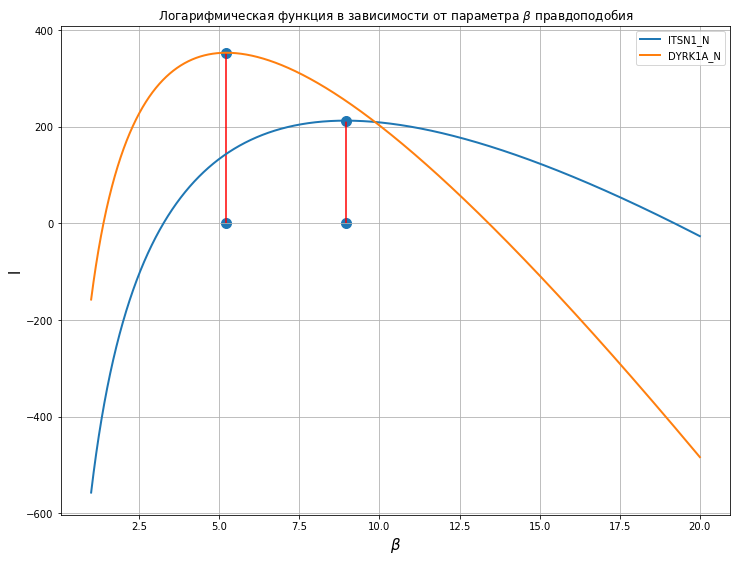

In [30]:
plt.figure(figsize = (12, 9))
plt.grid(True)
plt.plot(grid1, arr1.T[1], linewidth=2, label = 'ITSN1_N')
plt.plot(grid1, arr2.T[1], linewidth=2, label = 'DYRK1A_N')
plt.title('Логарифмическая функция в зависимости от параметра $\\beta$ правдоподобия')
plt.xlabel('$\\beta$', fontsize=15)
plt.ylabel('l', fontsize=15)
plt.vlines(b_max1, 0, arr1.T[1][ind_max1], color='r')
plt.vlines(b_max2, 0, arr2.T[1][ind_max2], color='r')
plt.scatter([b_max1, b_max2, b_max1, b_max2], [arr1.T[1][ind_max1], arr2.T[1][ind_max2], 0, 0], s = 100)

plt.legend()
plt.show()



**Вывод**

Для белка ITSN1_N у нас получилось, что $\beta = 8.9436$, хотя в прошлой части задачи мы предполагали 13.5. При этом оцениваемый параметр по новому известному параметру получился $\theta = 14.4929$ против 21.8764. Довольно большая разница. 


Аналогично: Для белка DYRK1A_N у нас получилось, что $\beta = 5.2203$, хотя в прошлой части задачи мы предполагали 9. При этом оцениваемый параметр по новому известному параметру получился $\theta = 12.2597$ против 21.1362. Довольно большая разница.

Посмотрим на гистограммы:

/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensi

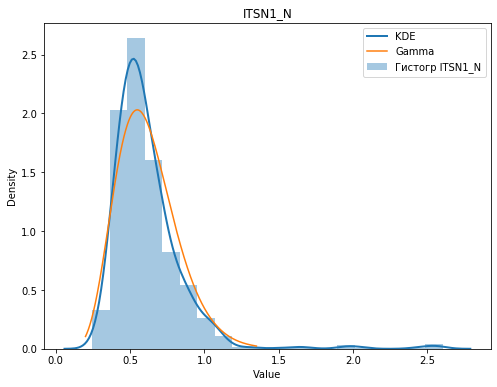

/home/gringo/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensi

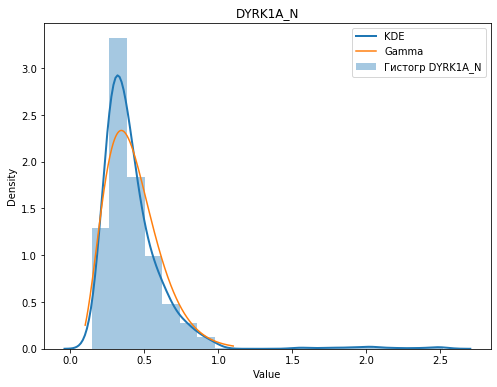

In [31]:
__dict = {'ITSN1_N': (8.9436, 14.4929), 
          'DYRK1A_N': (5.2203, 12.2597)
}

for column, value in __dict.items():
    plt.figure(figsize = (8, 6))
    sns.distplot(cleaned_df[column], bins = 20, label = f'Гистогр {column}', kde_kws={"label": "KDE", "linewidth": 2})

    grid = np.linspace(*ranges[column], 1000)
    plt.plot(grid, sps.gamma.pdf(grid, a = __dict[column][0],
                                     scale = 1/__dict[column][1]), label = 'Gamma')
    
    plt.title(f'{column}')
    plt.xlabel('Value')
    plt.legend()
    plt.show()

Постройте для каждого признака на одном графике гистограмму каждого признака, график ядерной оценки плотности и график плотности распределения с параметрами, являющимися полученной ОМП. Графики для разных признаков стройте на разных графиках, но в одном окне. Сравните получившиеся результаты с результатами, полученным в первой части задачи. Сделайте выводы.

**Вывод**

In [2]:
class A:
    def __init__(self, a, b):
        self.name = 'a'
    def __init__(self, a):
        self.name = 'b'
    def get_name():
        print(self.name)

Наши оценки в этом пункцте получились "сравнимы" с прошлыми. С одной стороны гамма распределение с нашими параметрами не сильно "реагирует" на высокий пик, который может быть случайным скоплением точек. Но с другой стороны, если это не случайное скопление, а важная область точек, требующая дополнительного исследования, то наши параметры это "не учитывают".